 ## Домашнее задание
 
 **Подбор параметров**
 
Взять boston house-prices database (sklearn.datasets.load_boston) и сделать то же самое для задачи регрессии (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество)

In [55]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style()

In [21]:
data = load_boston()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Использование различных значений *random_state***

In [18]:
for i in range(18):
    rand_state = np.random.randint(419)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rand_state, test_size=0.2)
    
    model1 = DecisionTreeRegressor()
    model1.fit(X_train, y_train)
    y_pred1 = model1.predict(X_test)
    
    model2 = GradientBoostingRegressor()
    model2.fit(X_train, y_train)
    y_pred2 = model2.predict(X_test)
    
    mse1 = mean_squared_error(y_test, y_pred1)
    mse2 = mean_squared_error(y_test, y_pred2)
    
    mae1 = mean_absolute_error(y_test, y_pred1)
    mae2 = mean_absolute_error(y_test, y_pred2)
    
    print(20*'-' + f'\n#{i}')
    print(f'MSE for Decision Tree:     {mse1:.3f}')
    print(f'MSE for Gradient Boosting: {mse2:.3f}')
    print(f'MAE for Decision Tree:     {mae1:.3f}')
    print(f'MAE for Gradient Boosting: {mae2:.3f}')


--------------------
#0
MSE for Decision Tree:     25.580
MSE for Gradient Boosting: 11.061
MAE for Decision Tree:     3.296
MAE for Gradient Boosting: 2.333
--------------------
#1
MSE for Decision Tree:     14.001
MSE for Gradient Boosting: 5.287
MAE for Decision Tree:     2.684
MAE for Gradient Boosting: 1.700
--------------------
#2
MSE for Decision Tree:     13.801
MSE for Gradient Boosting: 9.926
MAE for Decision Tree:     2.512
MAE for Gradient Boosting: 2.243
--------------------
#3
MSE for Decision Tree:     18.211
MSE for Gradient Boosting: 11.541
MAE for Decision Tree:     2.911
MAE for Gradient Boosting: 2.116
--------------------
#4
MSE for Decision Tree:     42.158
MSE for Gradient Boosting: 9.879
MAE for Decision Tree:     3.655
MAE for Gradient Boosting: 2.257
--------------------
#5
MSE for Decision Tree:     26.387
MSE for Gradient Boosting: 14.250
MAE for Decision Tree:     3.280
MAE for Gradient Boosting: 2.469
--------------------
#6
MSE for Decision Tree:     41.2

**Нахождение оптимальной глубины для DecisionTree с использованием кросс-валидации**

In [39]:
best = (0, 10000)
for dep in range(2, 21):
    model = DecisionTreeRegressor(max_depth=dep)
    scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
    avg = np.absolute(np.mean(scores))
    
    print(f'max_depth: {dep}\tAverage MAE: {avg:.4f}')
    
    if avg < best[1]:
        best = (dep, avg)
    
print(f'\nBest max_depth is {best[0]} with average MAE = {best[1]:.4f}')

max_depth: 2	Average MAE: 4.6178
max_depth: 3	Average MAE: 4.3797
max_depth: 4	Average MAE: 3.8586
max_depth: 5	Average MAE: 3.7637
max_depth: 6	Average MAE: 3.7343
max_depth: 7	Average MAE: 3.6850
max_depth: 8	Average MAE: 3.8338
max_depth: 9	Average MAE: 3.8670
max_depth: 10	Average MAE: 3.8243
max_depth: 11	Average MAE: 4.0531
max_depth: 12	Average MAE: 4.0265
max_depth: 13	Average MAE: 3.9500
max_depth: 14	Average MAE: 3.8125
max_depth: 15	Average MAE: 3.8882
max_depth: 16	Average MAE: 3.7423
max_depth: 17	Average MAE: 3.9220
max_depth: 18	Average MAE: 3.7554
max_depth: 19	Average MAE: 3.9333
max_depth: 20	Average MAE: 4.0159

Best max_depth is 7 with average MAE = 3.6850


**Использование GridSearchCV**

In [40]:
depth = list(range(2, 21))

param_grid = dict(max_depth=depth)

grid = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, cv=10, scoring='neg_mean_absolute_error')
grid.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20]},
      

In [43]:
mean_scores = np.absolute(grid.cv_results_['mean_test_score'])
print(mean_scores)

[4.61776065 4.33165229 3.94042841 3.6894167  3.56597503 3.84319015
 3.72239424 3.90705257 4.03614641 4.0410231  3.83383668 4.07969039
 4.07419463 4.09029365 3.94207065 3.89321711 4.01283333 3.79648627
 3.77558039]


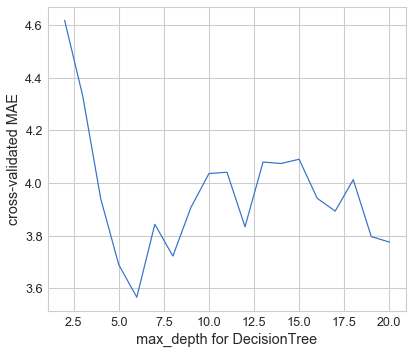

In [44]:
plt.plot(depth, mean_scores)
plt.xlabel('max_depth for DecisionTree')
plt.ylabel('cross-validated MAE')
plt.show()

In [63]:
print(f'Best MAE score for GridSearchCV is {np.absolute(grid.best_score_):.4f} with best {list(grid.best_params_.keys())[0]}={list(grid.best_params_.values())[0]}')

Best MAE score for GridSearchCV is 3.5660 with best max_depth=6


**Использование *RandomizedSearchCV***

In [59]:
param_grid = dict(criterion=['mse', 'mae'], max_depth=depth)

rnd_search = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions=param_grid, scoring='neg_mean_absolute_error')
rnd_search.fit(X, y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid

In [60]:
rnd_search.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [61]:
rnd_search.best_params_

{'max_depth': 5, 'criterion': 'mae'}

In [62]:
rnd_search.best_score_

-3.670995923121724

In [65]:
print(f'Best {rnd_search.best_params_["criterion"].upper()} score for RandomSearchCV is {np.absolute(rnd_search.best_score_):.4f} with best {list(rnd_search.best_params_.keys())[0]}={rnd_search.best_params_["max_depth"]}')

Best MAE score for RandomSearchCV is 3.6710 with best max_depth=5
